In [1]:
%pip install pyautogen matplotlib yfinance


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from IPython.display import Image, display

import autogen
from autogen.coding import LocalCommandLineCodeExecutor

config_list = autogen.config_list_from_json(
    env_or_file="OAI_CONFIG_LIST.json",
)

/home/andy/works/openai/autogen_playground/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:

assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config={
        "config_list": config_list,
        "temperature": 0, 
    }, 
    system_message="당신은 파이썬 코드를 전문적으로 만드는 에이전트입니다. 코드를 생성하고 오류가 있으면 수정하세요. 답변이 완료되면 TERMINATE를 응답하세요",
)


user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        # the executor to run the generated code
        "executor": LocalCommandLineCodeExecutor(work_dir="coding"),
    },
)

chat_res = user_proxy.initiate_chat(
    assistant,
    message="""오늘은 며칠인가요? META와 TESLA의 연간 누적 수익률을 비교하세요.""",
    summary_method="reflection_with_llm",
)

user_proxy (to assistant):

오늘은 며칠인가요? META와 TESLA의 연간 누적 수익률을 비교하세요.

--------------------------------------------------------------------------------


assistant (to user_proxy):

오늘 날짜를 확인하고 META와 TESLA의 연간 누적 수익률을 비교하는 파이썬 코드를 작성하겠습니다. 이를 위해 `yfinance` 라이브러리를 사용하여 주식 데이터를 가져오고, `pandas`와 `datetime` 라이브러리를 사용하여 데이터를 처리하겠습니다.

먼저 필요한 라이브러리를 설치해야 합니다:
```bash
pip install yfinance pandas
```

이제 파이썬 코드를 작성하겠습니다:

```python
import yfinance as yf
import pandas as pd
from datetime import datetime

# 오늘 날짜를 확인합니다.
today = datetime.today().strftime('%Y-%m-%d')
print(f"오늘 날짜는 {today}입니다.")

# 연초 날짜를 설정합니다.
start_date = f"{datetime.today().year}-01-01"

# META와 TSLA의 주식 데이터를 가져옵니다.
meta = yf.Ticker("META")
tesla = yf.Ticker("TSLA")

# 연초부터 오늘까지의 주식 데이터를 다운로드합니다.
meta_data = meta.history(start=start_date, end=today)
tesla_data = tesla.history(start=start_date, end=today)

# 연초 대비 누적 수익률을 계산합니다.
meta_cumulative_return = (meta_data['Close'][-1] / meta_data['Close'][0] - 1) * 100
tesla_cumulative_return = (tesla_data['Close'][-1] / tesla_data['Close'][0] - 1) * 100

print(f"META의 연간 누적 수익률: {meta_cumulative_return:.2f}%")
print(f"TESLA의 연간 누적 수익률:

In [9]:
print("Chat history:", chat_res.chat_history)

print("Summary:", chat_res.summary)
print("Cost info:", chat_res.cost)

Chat history: [{'content': '오늘은 며칠인가요? META와 TESLA의 연간 누적 수익률을 비교하세요.', 'role': 'assistant'}, {'content': '오늘 날짜를 확인하고 META와 TESLA의 연간 누적 수익률을 비교하는 파이썬 코드를 작성하겠습니다. 이를 위해 `yfinance` 라이브러리를 사용하여 주식 데이터를 가져오고, `pandas`와 `datetime` 라이브러리를 사용하여 데이터를 처리하겠습니다.\n\n먼저 필요한 라이브러리를 설치해야 합니다:\n```bash\npip install yfinance pandas\n```\n\n이제 파이썬 코드를 작성하겠습니다:\n\n```python\nimport yfinance as yf\nimport pandas as pd\nfrom datetime import datetime\n\n# 오늘 날짜를 확인합니다.\ntoday = datetime.today().strftime(\'%Y-%m-%d\')\nprint(f"오늘 날짜는 {today}입니다.")\n\n# 연초 날짜를 설정합니다.\nstart_date = f"{datetime.today().year}-01-01"\n\n# META와 TSLA의 주식 데이터를 가져옵니다.\nmeta = yf.Ticker("META")\ntesla = yf.Ticker("TSLA")\n\n# 연초부터 오늘까지의 주식 데이터를 다운로드합니다.\nmeta_data = meta.history(start=start_date, end=today)\ntesla_data = tesla.history(start=start_date, end=today)\n\n# 연초 대비 누적 수익률을 계산합니다.\nmeta_cumulative_return = (meta_data[\'Close\'][-1] / meta_data[\'Close\'][0] - 1) * 100\ntesla_cumulative_return = (tesla_data[\'Close\'][-1] /

In [10]:
user_proxy.send(
    recipient=assistant,
    message="""연간 주가 변동 차트를 플롯합니다. 데이터를 stock_price_ytd.csv에 저장하고 플롯을 stock_price_ytd.png에 저장합니다.""",
)

user_proxy (to assistant):

연간 주가 변동 차트를 플롯합니다. 데이터를 stock_price_ytd.csv에 저장하고 플롯을 stock_price_ytd.png에 저장합니다.

--------------------------------------------------------------------------------
assistant (to user_proxy):

연간 주가 변동 차트를 플롯하고 데이터를 CSV 파일에 저장하며, 플롯을 PNG 파일로 저장하는 코드를 작성하겠습니다. 이를 위해 `matplotlib` 라이브러리를 사용하여 차트를 그리겠습니다.

필요한 라이브러리를 설치합니다:
```bash
pip install yfinance pandas matplotlib
```

이제 파이썬 코드를 작성하겠습니다:

```python
import yfinance as yf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# 오늘 날짜를 확인합니다.
today = datetime.today().strftime('%Y-%m-%d')
print(f"오늘 날짜는 {today}입니다.")

# 연초 날짜를 설정합니다.
start_date = f"{datetime.today().year}-01-01"

# META와 TSLA의 주식 데이터를 가져옵니다.
meta = yf.Ticker("META")
tesla = yf.Ticker("TSLA")

# 연초부터 오늘까지의 주식 데이터를 다운로드합니다.
meta_data = meta.history(start=start_date, end=today)
tesla_data = tesla.history(start=start_date, end=today)

# 데이터프레임에 종가 데이터를 저장합니다.
df = pd.DataFrame({
    'Date': meta_data.index,
    'META_C

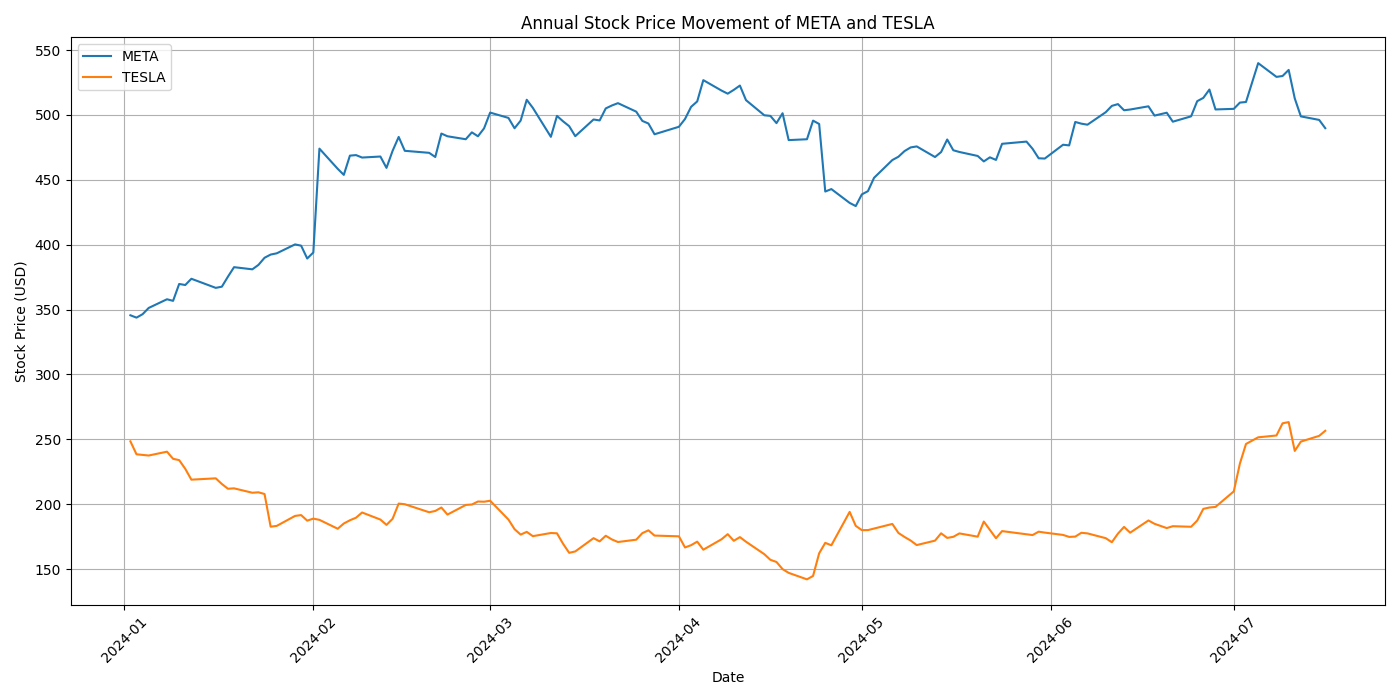

In [11]:
try:
    image = Image(filename="coding/stock_price_ytd.png")
    display(image)
except FileNotFoundError:
    print("Image not found. Please check the file name and modify if necessary.")

In [12]:
# Path to your CSV file
file_path = "coding/stock_price_ytd.csv"
try:
    with open(file_path, mode="r", encoding="utf-8") as file:
        # Read each line in the file
        for line in file:
            # Split the line into a list using the comma as a separator
            row = line.strip().split(",")
            # Print the list representing the current row
            print(row)
except FileNotFoundError:
    print("File not found. Please check the file name and modify if necessary.")

['Date', 'Close', 'Company']
['2024-01-02 00:00:00-05:00', '345.5798645019531', 'META']
['2024-01-03 00:00:00-05:00', '343.7635803222656', 'META']
['2024-01-04 00:00:00-05:00', '346.40814208984375', 'META']
['2024-01-05 00:00:00-05:00', '351.228271484375', 'META']
['2024-01-08 00:00:00-05:00', '357.92449951171875', 'META']
['2024-01-09 00:00:00-05:00', '356.697021484375', 'META']
['2024-01-10 00:00:00-05:00', '369.71026611328125', 'META']
['2024-01-11 00:00:00-05:00', '368.91192626953125', 'META']
['2024-01-12 00:00:00-05:00', '373.7220153808594', 'META']
['2024-01-16 00:00:00-05:00', '366.7064514160156', 'META']
['2024-01-17 00:00:00-05:00', '367.61456298828125', 'META']
['2024-01-18 00:00:00-05:00', '375.3586730957031', 'META']
['2024-01-19 00:00:00-05:00', '382.6636657714844', 'META']
['2024-01-22 00:00:00-05:00', '380.9970703125', 'META']
['2024-01-23 00:00:00-05:00', '384.4100646972656', 'META']
['2024-01-24 00:00:00-05:00', '389.8987731933594', 'META']
['2024-01-25 00:00:00-05:00

## Example Task: Use User Defined Message Function to let Agents Analyze data Collected

In [21]:
def my_message_generator(sender, recipient, context):
    # your CSV file
    file_name = context.get("file_name")
    try:
        with open(file_name, mode="r", encoding="utf-8") as file:
            file_content = file.read()
    except FileNotFoundError:
        file_content = "No data found."
    return "데이터를 분석하고 간단하지만 매력적인 블로그 게시물을 작성하세요.. \n Data: \n" + file_content


# followup of the previous question
chat_res = user_proxy.initiate_chat(
    recipient=assistant,
    message=my_message_generator,
    file_name="coding/stock_price_ytd.csv",
    summary_method="reflection_with_llm",
    summary_args={"summary_prompt": "마크다운형태로 블로그 포스트를 한국어로 반환해줘"},
)



user_proxy (to assistant):

데이터를 분석하고 간단하지만 매력적인 블로그 게시물을 작성하세요.. 
 Data: 
Date,Close,Company
2024-01-02 00:00:00-05:00,345.5798645019531,META
2024-01-03 00:00:00-05:00,343.7635803222656,META
2024-01-04 00:00:00-05:00,346.40814208984375,META
2024-01-05 00:00:00-05:00,351.228271484375,META
2024-01-08 00:00:00-05:00,357.92449951171875,META
2024-01-09 00:00:00-05:00,356.697021484375,META
2024-01-10 00:00:00-05:00,369.71026611328125,META
2024-01-11 00:00:00-05:00,368.91192626953125,META
2024-01-12 00:00:00-05:00,373.7220153808594,META
2024-01-16 00:00:00-05:00,366.7064514160156,META
2024-01-17 00:00:00-05:00,367.61456298828125,META
2024-01-18 00:00:00-05:00,375.3586730957031,META
2024-01-19 00:00:00-05:00,382.6636657714844,META
2024-01-22 00:00:00-05:00,380.9970703125,META
2024-01-23 00:00:00-05:00,384.4100646972656,META
2024-01-24 00:00:00-05:00,389.8987731933594,META
2024-01-25 00:00:00-05:00,392.3736877441406,META
2024-01-26 00:00:00-05:00,393.3317565917969,META
2024-01-29 00:00:00-05:0

In [22]:
print(chat_res.summary)



# Meta와 Tesla 주식 분석: 2024년 상반기

2024년 상반기 동안 Meta와 Tesla의 주식 가격은 큰 변동을 보였습니다. 이 블로그 게시물에서는 두 회사의 주식 가격 변동을 분석하고, 주요 트렌드와 주목할 만한 사건들을 살펴보겠습니다.

## Meta 주식 분석

Meta의 주식은 2024년 1월 2일에 $345.58로 시작하여 7월 16일에 $256.56로 마감했습니다. 이 기간 동안 Meta의 주식은 꾸준히 상승세를 보였으며, 특히 2월과 3월에 큰 폭으로 상승했습니다.

### 주요 트렌드

1. **1월 상승세**: 1월 초 Meta의 주식은 $345.58에서 $400.20로 상승했습니다. 이는 Meta의 새로운 제품 출시와 관련된 긍정적인 뉴스 덕분일 가능성이 큽니다.
2. **2월 급등**: 2월 2일 Meta의 주식은 $474.02로 급등했습니다. 이는 Meta의 분기 실적 발표와 관련된 긍정적인 반응 때문일 수 있습니다.
3. **3월 안정세**: 3월에는 주식 가격이 $500대를 유지하며 안정세를 보였습니다.
4. **4월 하락세**: 4월 말부터 주식 가격이 하락하기 시작하여 5월 초에는 $440대로 떨어졌습니다. 이는 시장의 불확실성과 관련된 뉴스 때문일 수 있습니다.
5. **6월 회복세**: 6월에는 다시 주식 가격이 상승하여 $500대를 회복했습니다.

## Tesla 주식 분석

Tesla의 주식은 2024년 1월 2일에 $248.42로 시작하여 7월 16일에 $256.56로 마감했습니다. Tesla의 주식은 Meta와 달리 큰 변동을 보였으며, 특히 3월과 4월에 큰 폭으로 하락했습니다.

### 주요 트렌드

1. **1월 하락세**: 1월 초 Tesla의 주식은 $248.42에서 $190.93로 하락했습니다. 이는 Tesla의 생산 문제와 관련된 뉴스 때문일 수 있습니다.
2. **2월 회복세**: 2월에는 주식 가격이 다시 상승하여 $202.64로 회복했습니다.
3. **3월 급락**: 3월에는 주식 가격이 

# Meta와 Tesla 주식 분석: 2024년 상반기

2024년 상반기 동안 Meta와 Tesla의 주식 가격은 큰 변동을 보였습니다. 이 블로그 게시물에서는 두 회사의 주식 가격 변동을 분석하고, 주요 트렌드와 주목할 만한 사건들을 살펴보겠습니다.

## Meta 주식 분석

Meta의 주식은 2024년 1월 2일에 $345.58로 시작하여 7월 16일에 $256.56로 마감했습니다. 이 기간 동안 Meta의 주식은 꾸준히 상승세를 보였으며, 특히 2월과 3월에 큰 폭으로 상승했습니다.

### 주요 트렌드

1. **1월 상승세**: 1월 초 Meta의 주식은 $345.58에서 $400.20로 상승했습니다. 이는 Meta의 새로운 제품 출시와 관련된 긍정적인 뉴스 덕분일 가능성이 큽니다.
2. **2월 급등**: 2월 2일 Meta의 주식은 $474.02로 급등했습니다. 이는 Meta의 분기 실적 발표와 관련된 긍정적인 반응 때문일 수 있습니다.
3. **3월 안정세**: 3월에는 주식 가격이 $500대를 유지하며 안정세를 보였습니다.
4. **4월 하락세**: 4월 말부터 주식 가격이 하락하기 시작하여 5월 초에는 $440대로 떨어졌습니다. 이는 시장의 불확실성과 관련된 뉴스 때문일 수 있습니다.
5. **6월 회복세**: 6월에는 다시 주식 가격이 상승하여 $500대를 회복했습니다.

## Tesla 주식 분석

Tesla의 주식은 2024년 1월 2일에 $248.42로 시작하여 7월 16일에 $256.56로 마감했습니다. Tesla의 주식은 Meta와 달리 큰 변동을 보였으며, 특히 3월과 4월에 큰 폭으로 하락했습니다.

### 주요 트렌드

1. **1월 하락세**: 1월 초 Tesla의 주식은 $248.42에서 $190.93로 하락했습니다. 이는 Tesla의 생산 문제와 관련된 뉴스 때문일 수 있습니다.
2. **2월 회복세**: 2월에는 주식 가격이 다시 상승하여 $202.64로 회복했습니다.
3. **3월 급락**: 3월에는 주식 가격이 $162.50로 급락했습니다. 이는 Tesla의 분기 실적 발표와 관련된 부정적인 반응 때문일 수 있습니다.
...

2024년 상반기 동안 Meta와 Tesla의 주식은 각각 다른 경로를 보였습니다. Meta는 전반적으로 상승세를 보였으며, 특히 2월과 3월에 큰 폭으로 상승했습니다. 반면 Tesla는 큰 변동을 보였으며, 특히 3월과 4월에 큰 폭으로 하락했습니다.

이러한 주식 가격 변동은 각 회사의 실적 발표, 제품 출시, 시장의 불확실성 등 다양한 요인에 의해 영향을 받았습니다. 투자자들은 이러한 요인들을 주의 깊게 살펴보고, 신중한 투자 결정을 내리는 것이 중요합니다.
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...